In [1]:
import pandas as pd
import numpy as np
aruba_dataset_path = '/data/dataDeebul/thesis/dataset/strands/aruba/locations.names'

location_names = {}
count = 0
with open(aruba_dataset_path, 'r') as content_file:
    content = content_file.read()
    content = str.splitlines(content)
for count,location in enumerate(content):
    location_names[count] = location
print(location_names)


aruba_dataset_path = '/data/dataDeebul/thesis/dataset/strands/aruba/locations.min'

dataset = pd.read_csv(aruba_dataset_path, names=['location', 'time'])
dataset['time'] = dataset.index
dataset['time'] = pd.to_timedelta(dataset['time'], unit='m')
dataset['minute'] = (dataset['time']/ np.timedelta64(1, 'm')).astype(int)


#Renaming location number with their names
for key,value in location_names.items():
    dataset.ix[dataset.location ==key, 'location_name'] = value
    
def mod_for_minute(row):
    return row['minute'] % 1440
dataset['sep_minute'] = dataset.apply(mod_for_minute, axis=1)

{0: 'Master bedroom', 1: 'Master bathroom', 2: 'Living room', 3: 'Kitchen', 4: 'Center', 5: 'Corridor', 6: 'Second bedroom', 7: 'Office', 8: 'Second bathroom', 9: 'Outside'}


In [2]:
living_room_data = dataset[dataset['location_name'].isin(['Living room'])]
kitchen_data = dataset[dataset['location_name'].isin(['Kitchen'])]

In [6]:
%matplotlib inline
plt.style.use('bmh')
colors = ['#348ABD', '#A60628', '#7A68A6', '#467821', '#D55E00', 
          '#CC79A7', '#56B4E9', '#009E73', '#F0E442', '#0072B2']

(200,)


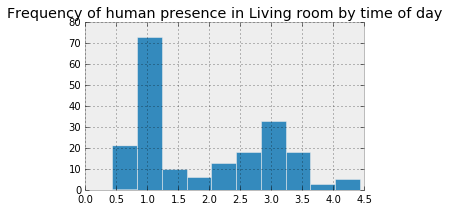

In [62]:
import numpy as np
import matplotlib.pyplot as plt
y0 = np.random.normal(1 , 0.2, size=50)
y1 = np.random.normal(1 , 0.2, size=50)
y2 = np.random.normal(3 , 0.3, size=50)
y3 = np.random.normal(3 , 0.9, size=50)
y = np.hstack([y0, y1, y2, y3])
print (y.shape)

fig = plt.figure(figsize=(5,3))
_ = plt.title('Frequency of human presence in Living room by time of day')
_ = plt.hist(y)


In [63]:
N = 200
D = 1
K = 10

from bayespy.nodes import Dirichlet, Categorical
alpha = Dirichlet(0.1*np.ones(K),
                   name='alpha')
Z = Categorical(alpha,
                 plates=(N,),
                 name='z')

from bayespy.nodes import Gaussian, Wishart
mu = Gaussian(np.zeros(D), 1e-5*np.identity(D),
               plates=(K,),
               name='mu')
Lambda = Wishart(D, 1e-5*np.identity(D),
                  plates=(K,),
                  name='Lambda')

from bayespy.nodes import Mixture
Y = Mixture(Z, Gaussian, mu, Lambda,
             name='Y')

Z.initialize_from_random()
from bayespy.inference import VB
Q = VB(Y, mu, Lambda, Z, alpha)
y = y.reshape((N,1))
Y.observe(y)

Q.update(repeat=1000)

Iteration 1: loglike=-5.182647e+02 (0.030 seconds)
Iteration 2: loglike=-4.641052e+02 (0.026 seconds)
Iteration 3: loglike=-4.617648e+02 (0.023 seconds)
Iteration 4: loglike=-4.532791e+02 (0.021 seconds)
Iteration 5: loglike=-4.232238e+02 (0.022 seconds)
Iteration 6: loglike=-3.880144e+02 (0.020 seconds)
Iteration 7: loglike=-3.716561e+02 (0.019 seconds)
Iteration 8: loglike=-3.633484e+02 (0.021 seconds)
Iteration 9: loglike=-3.586977e+02 (0.019 seconds)
Iteration 10: loglike=-3.561635e+02 (0.020 seconds)
Iteration 11: loglike=-3.547912e+02 (0.021 seconds)
Iteration 12: loglike=-3.539149e+02 (0.019 seconds)
Iteration 13: loglike=-3.531175e+02 (0.019 seconds)
Iteration 14: loglike=-3.521242e+02 (0.021 seconds)
Iteration 15: loglike=-3.506220e+02 (0.019 seconds)
Iteration 16: loglike=-3.481929e+02 (0.019 seconds)
Iteration 17: loglike=-3.453151e+02 (0.021 seconds)
Iteration 18: loglike=-3.344446e+02 (0.019 seconds)
Iteration 19: loglike=-3.317996e+02 (0.019 seconds)
Iteration 20: loglike

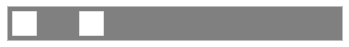

In [64]:
import bayespy.plot as bplot

bplot.hinton(alpha)

In [105]:
N = 10
D = 1
data = np.random.normal(5, 10, size=(N,))

from bayespy.nodes import Gaussian, Wishart
mu = Gaussian(np.zeros(D), 1e-5*np.identity(D),
               name='mu')
Lambda = Wishart(D, 1e-5*np.identity(D),
                  name='Lambda')

Y = Gaussian(mu, Lambda, plates=(N,), name='Y')
from bayespy.inference import VB
Q = VB(Y, mu, Lambda)
data = data.reshape((N,1))
Y.observe(data)

Q.update(repeat=1000)

Iteration 1: loglike=-5.723340e+01 (0.009 seconds)
Iteration 2: loglike=-4.979318e+01 (0.008 seconds)
Iteration 3: loglike=-4.979118e+01 (0.009 seconds)
Iteration 4: loglike=-4.979117e+01 (0.007 seconds)
Converged at iteration 4.


[array([[ 0.01203485]]), array(-4.513603208091812)]


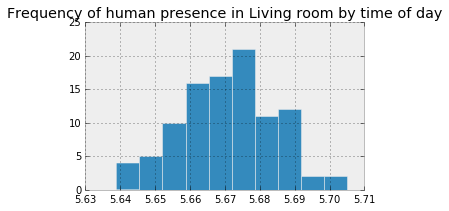

In [127]:
print (Lambda.get_moments())
posterior_data = np.random.normal(mu.get_moments()[0], Lambda.get_moments()[0], size=(100))
fig = plt.figure(figsize=(5,3))
_ = plt.title('Frequency of human presence in Living room by time of day')
_ = plt.hist(posterior_data, range)


In [101]:
data = np.random.normal(5, 10, size=(10,))

from bayespy.nodes import GaussianARD, Gamma
mu = GaussianARD(0, 1e-6)
tau = Gamma(1e-6, 1e-6)
y = GaussianARD(mu, tau, plates=(10,))
y.observe(data)

from bayespy.inference import VB
Q = VB(y, mu, tau)
Q.update(repeat=20)

Iteration 1: loglike=-5.871958e+01 (0.008 seconds)
Iteration 2: loglike=-5.686317e+01 (0.007 seconds)
Iteration 3: loglike=-5.686081e+01 (0.007 seconds)
Iteration 4: loglike=-5.686079e+01 (0.007 seconds)
Converged at iteration 4.


In [102]:
mu.get_moments()

[array(8.295353564187677), array(80.49559604730806)]

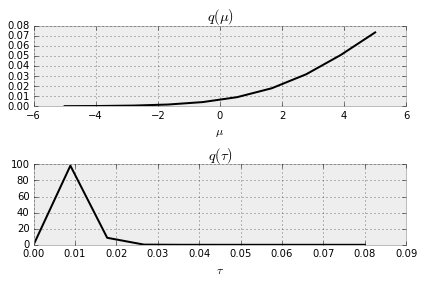

In [103]:
import bayespy.plot as bpplt
bpplt.pyplot.subplot(2, 1, 1)
bpplt.pdf(mu, np.linspace(-5, 5, num=N), color='k', name=r'\mu')
bpplt.pyplot.subplot(2, 1, 2)
bpplt.pdf(tau, np.linspace(1e-6, 0.08, num=N), color='k', name=r'\tau')
bpplt.pyplot.tight_layout()
bpplt.pyplot.show()